In [1]:
# Import standard libraries
import os
import sys
import itertools
# Import libraries to manage arrays, plotting, and Flash-X datasets
import numpy
import matplotlib.pyplot as pyplot
import boxkit
from boxkit.library import Server as BoxServer

In [2]:
PROJECT_HOME="/home/akash/Desktop/Akash/Workbench/Flash-X-Simulations/simulation/PoolBoiling/SingleBubble"

In [3]:
sedona = BoxServer(hostname="c361652l.cels.anl.gov", username="akash")
sedona.connect()

datasetLoc = {
    r"$l_b = 0.5$" : PROJECT_HOME + os.sep + "jobnode.archive/buffer_0.5_long_twait_0.4",
    r"$l_b = 1.0$" : PROJECT_HOME + os.sep + "jobnode.archive/buffer_1.0_long",
}

datasetTags = {
    r"$l_b = 0.5$" : [*range(357,392)], #[*range(335,370)],
    r"$l_b = 1.0$" : [*range(332,367)],
}

lengthTags = len(datasetTags["$l_b = 0.5$"])

datasetList = []

for tag in range(lengthTags):
    datasetDict = {}
    for dsetKey in datasetLoc.keys():
        dataset = boxkit.read_dataset(datasetLoc[dsetKey] 
                                      + os.sep 
                                      + "INS_Pool_Boiling_hdf5_plt_cnt_"
                                      + str(datasetTags[dsetKey][tag]).zfill(4), source="flash", server=sedona)
        datasetDict[dsetKey] = boxkit.mergeblocks(dataset, ["dfun"])
    datasetList.append(datasetDict)
sedona.close()

[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remot

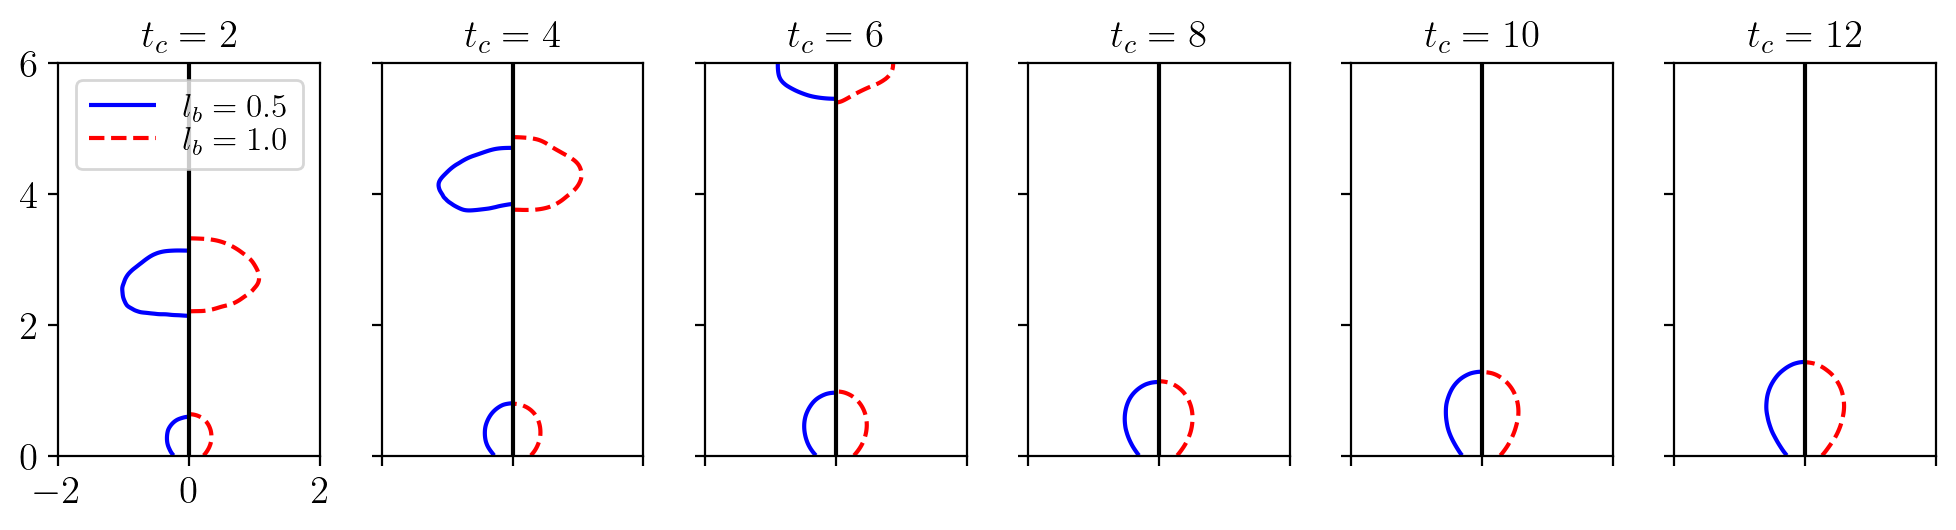

In [43]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

#tagList = [0, 4, 8, 12, 16, 20, 24, 28, 32]
tagList = [4, 8, 12, 16, 20, 24]

figure, subplotList = pyplot.subplots(1,len(tagList),sharey="row", figsize=(10,4), dpi=200)

for subplot, datasetDict, tag in zip(subplotList, [datasetList[tg] for tg in tagList], tagList):
    linestyle = itertools.cycle(("-", "--", ":", "-."))
    colors = itertools.cycle(("blue","red","blue","green"))
    
    if subplot == subplotList[0]:
        legendHandle = []
        legendName = []
    
    for dsetKey in datasetDict.keys():
        for block in datasetDict[dsetKey].blocklist:
            xmesh, ymesh = numpy.meshgrid(block.xrange("center"),block.yrange("center"))
            if dsetKey == "$l_b = 0.5$":
                contour = subplot.contour(-xmesh, ymesh, block["dfun"][0,:,:], 
                                          levels=[0], 
                                          linestyles=next(linestyle), colors=next(colors))
            else:
                contour = subplot.contour(xmesh, ymesh, block["dfun"][0,:,:], 
                                          levels=[0], 
                                          linestyles=next(linestyle), colors=next(colors))

            if subplot == subplotList[0]:
                h,l = contour.legend_elements()
                legendHandle.append(h[0])
                legendName.append(dsetKey)
                
    subplot.plot([0,0],[0,6],color="black")
    subplot.set_title(rf"$t_c={int(tag*.5)}$", fontsize=14)
    
    if subplot != subplotList[0]:
        subplot.xaxis.set_tick_params(labelbottom=False)
        #subplot.xaxis.set_major_locator(pyplot.NullLocator())
        #subplot.yaxis.set_major_locator(pyplot.NullLocator())
        
    subplot.set_xlim([-2,2])
    subplot.set_ylim([0,6])
    subplot.set_aspect('equal')
    
subplotList[0].legend(legendHandle, legendName, loc ="upper center", prop={"weight":"bold", "size":12}, labelspacing=0.1)
#subplotList[0].set_ylabel(r"$x_2$", labelpad=-1)
#subplotList[0].set_xlabel(r"$x_1$", labelpad=-1)
pyplot.subplots_adjust(wspace=-0.25, hspace=0)
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/pool.png")

In [17]:
lengthTags

35

In [5]:
growthDict = {}
for dsetKey in datasetDict.keys():
    growthDict[dsetKey] = []

for datasetDict, tag in zip(datasetList, range(lengthTags)):
    for dsetKey in datasetDict.keys():
        bubbleBase = boxkit.regionprops(datasetDict[dsetKey], "dfun")[0]
        growthDict[dsetKey].append(numpy.sqrt(2*bubbleBase["area"]*0.021*.021/numpy.pi)*2)

In [6]:
print((numpy.array(datasetTags["$l_b = 0.5$"])-335)*0.5, growthDict["$l_b = 0.5$"])

[11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5
 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5
 25.  25.5 26.  26.5 27.  27.5 28. ] [0.3864694529127794, 0.477460414617434, 0.5444917644120003, 0.6170057353029421, 0.670223031074407, 0.7249570513607007, 0.7751151811016098, 0.8153615080724604, 0.8550270336516415, 0.8923032390536287, 0.9341139573738493, 0.9671901224444927, 0.9991719474383535, 1.0339697331597795, 1.0676339436498166, 1.0936142379998903, 1.1224985284748021, 1.1491931079956679, 1.1776678814053099, 1.200335581518593, 1.2280819781134171, 1.2516314167704072, 1.276946376446056, 1.3026315241646966, 1.3244326139705704, 1.3462977410025807, 1.3674028187150737, 1.3857580402654959, 1.4086646836747498, 1.4292417743377839, 1.4491393689750802, 1.468002648961458, 1.4820872702579782, 0.3214276740076841, 0.41042610999845275]


In [7]:
refGrowth = numpy.array([[0.17758985200845667, 0.15266987612182326],
[0.7357293868921777, 0.4179169107720522],
[1.217758985200846, 0.5666726101021422],
[2.0042283298097257, 0.763722967981864],
[2.9429175475687117, 0.9367278840520645],
[3.983086680761101, 1.0816543128114997],
[4.820295983086682, 1.1823361097667626],
[5.987315010570826, 1.2991925418375403],
[6.9767441860465125, 1.4240216680676192],
[7.890063424947148, 1.5407931939173185],
[8.854122621564482, 1.6656138295252894],
[9.970401691331926, 1.7061480594683172],
[10.88372093023256, 1.7144858503782572],
[11.619450317124738, 1.7107160141623576]])


Text(0.5, 0, '$t$')

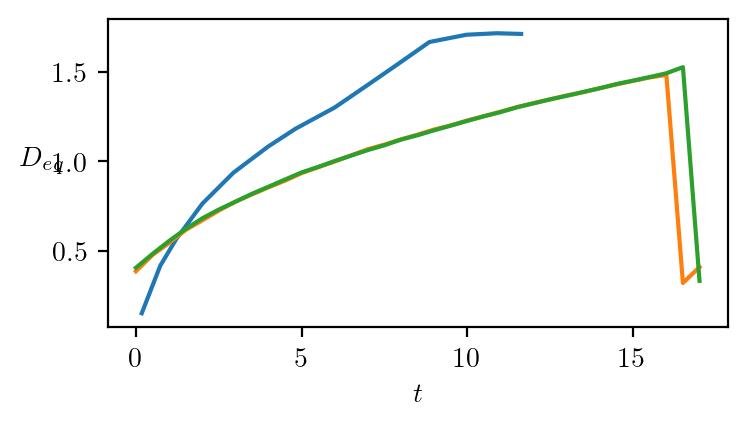

In [44]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
pyplot.figure(figsize=(4, 2), dpi=200)

bubbleGrowthDict = {}
for dsetKey in growthDict.keys():
    bubbleGrowthDict[dsetKey] = {}
    bubbleGrowthDict[dsetKey]["diameter"] = numpy.array(growthDict[dsetKey])
    bubbleGrowthDict[dsetKey]["time"] = (numpy.array(datasetTags[dsetKey])-datasetTags[dsetKey][0])*0.5
    bubbleGrowthDict[dsetKey]["diameter"] = bubbleGrowthDict[dsetKey]["diameter"].tolist()
    bubbleGrowthDict[dsetKey]["time"] = bubbleGrowthDict[dsetKey]["time"].tolist()

bubbleGrowthDict["Reference"] = {}
bubbleGrowthDict["Reference"]["diameter"] = refGrowth[:,1].tolist()
bubbleGrowthDict["Reference"]["time"] = refGrowth[:,0].tolist()
#pyplot.plot(refGrowth[:,0],refGrowth[:,1])
pyplot.plot(bubbleGrowthDict["Reference"]["time"], bubbleGrowthDict["Reference"]["diameter"])
pyplot.plot(bubbleGrowthDict["$l_b = 0.5$"]["time"], bubbleGrowthDict["$l_b = 0.5$"]["diameter"])
pyplot.plot(bubbleGrowthDict["$l_b = 1.0$"]["time"], bubbleGrowthDict["$l_b = 1.0$"]["diameter"])

pyplot.ylabel(r"$D_{eq}$", rotation=0)
pyplot.xlabel(r"$t$")

In [45]:
import json
with open("SingleBubble-Growth.json", "w") as growthFile:
    growthFile.write(json.dumps(bubbleGrowthDict))